In [2]:
import pandas as pd
import numpy as np
from typing import TypeVar
%pylab inline
import matplotlib.pyplot as plt
import os
import _pickle as cpickle
from math import log10
# from scipy import stats
from numpy.polynomial import Polynomial

Populating the interactive namespace from numpy and matplotlib


In [5]:
inp_dtypes = {
    "Chr": "string",
    "Start": "int",
    "End": "int",
    "Ref": "string",
    "Alt": "string"}
db_dtypes = {
    "#CHROM": "string",
    "POS": "int32",
    "ID": "int32",
    "REF": "string",
    "ALT": "string",
    "DN ID": "string",
    "Patient ID": "string",
    "Phenotype": "string",
    "Platform": "string",
    "Study": "string",
    "Pubmed ID": "int32"}
# inp_df = pd.read_csv("annovar-full/chr1_22243.txt", sep='\t', dtype=dtypes, na_values=None)
dbdf = pd.read_csv("databases/hg38_gene4denovo201907.txt", sep='\t', dtype=db_dtypes, na_values=None) 

In [ ]:
def binary_search(arr: list, low: int, high: int, x):
    if high >= low:
        mid = (high + low) // 2
        if arr[mid] == x:
            return arr[mid]
        elif arr[mid] > x:
            binary_search(arr, low, arr[mid] - 1, x)
        else:
            binary_search(arr, arr[mid] - 1, high, x)
    else:
        return -1

In [108]:
def chrom_strip(chromosome: str) -> int:
    # 'chr22' -> 22, 'chrX' -> 23
    if chromosome == "chrX":
        return 23
    elif chromosome == "chrY":
        return 24
    else:    
        return int(chromosome[3:])

17

In [119]:
nparr = TypeVar('numpy.ndarray')    
chromosome_list = [chrom+1 for chrom in range(24)]

def chrom_compression(chr_col: nparr) -> list:
    chr_col = list(map(chrom_strip, dbdf["#CHROM"].values))
    # 0 bc chromosome 1 will always begin at index 0
    idxs = [0]
    for chrom in chromosome_list:
        idxs.append(np.searchsorted(chr_col, chrom, side="right"))
    return idxs

print(db_idxs := chrom_compression(dbdf["#CHROM"].values))

[0, 45923, 96195, 137847, 176833, 213683, 248381, 280732, 313399, 338813, 366314, 394851, 422470, 441848, 460652, 478049, 497977, 514642, 530153, 543741, 556905, 564620, 572777, 580407, 580450]


[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000]
[13668, 3679509, 7752830, 12256441, 16896239, 21373982, 26033139, 30618002, 35323117, 40028077, 44817995, 50014727, 54863300, 59831649, 64891887, 70173480, 75111053, 79992474, 85216162, 90716660, 95985531, 100944380, 106337395, 111430639, 115989431, 121636872, 151285776, 155857347, 160258934, 165266363, 170383483, 175314055, 180257141, 185046726, 189960058, 195149213, 200297177, 204820540, 210033127, 214984016, 220075039, 225143852, 229991760, 234656594, 239343574, 244548816]


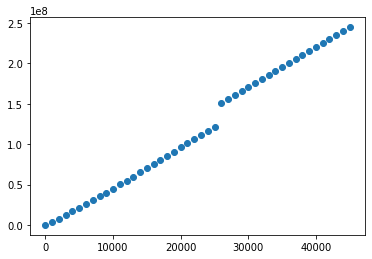

In [152]:
pos1 = dbdf["POS"].values[db_idxs[0]:db_idxs[1]]
# plt.scatter([x for x in range(len(pos1))], pos1)
# estimate idxs for chromosome 1
print(est_idxs1 := [x for x in range(len(pos1)) if x%1000 == 0])
print(est_pos1 := [pos1[x] for x in est_idxs1])
plt.scatter(est_idxs1, est_pos1)

[ 13668  15208  15354  20184  54170  64003  91393 103621 108582 114213
 114226 115732 116095 116120 118913 264557 266377 266538 268578 275263
 282980 291744 591525 609431 619713 629292 629307 629634 629990 630084
 633962 633963 633963 634025 634056 634056 634163 634163 634167 726549
 739062 739072 786760 816630 822758 842732 843950 843980 848167 852295
 852340 862130 873409 874955 880610 887799 889421 891707 894777 904479
 904479 904479 904479 904520 904536 904629 905251 905692 905692 913362
 915129 915679 920632 932170 935423 936930 942526 942995 943261 943995
 943995 944727 945088 945120 945358 945470 945839 945938 946422 950152
 951322 952708 953474 954695 955671 957401 958881 961969 962037 962359]
6
0 13668 
 99 962359


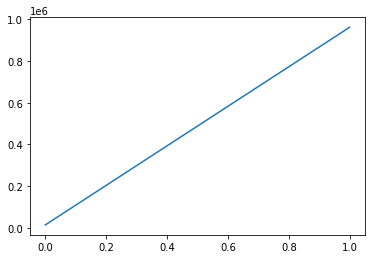

In [248]:
X = [x for x in range(100)]
Y = pos1[:100]

print(Y)

def groupby(arr: np.ndarray) -> np.ndarray:
    # take the digit of the last number (highest) in array
    last_num = int8(floor(math.log10(arr[-1])) + 1)
    return last_num

print(groupby(Y))
# plt.scatter(X, Y)
print(X[0], Y[0], "\n", X[len(X) - 1], Y[len(Y) - 1])
plt.plot([13668,962359], ls='-')
plt.show()

In [236]:
def poly_func_check(x_arr, y_arr, idx):
    x, y = x_arr[idx], y_arr[idx]
    
    def equation():
        raw_num = 892042.327998481 + 186974.09425648313 * x**1 - 143043.8290939058 * x**2 + 8875.21743134128 * x**3  
        return int(floor(raw_num))
    
    return "Actual: %s\nPredicted: %s" % (f'{y:,}', f'{equation():,}')

print(poly_func_check(X, Y, len(X) - 1))

Actual: 962,359
Predicted: 3,219,011,824
